# EDA on Instagram Coding Influncers
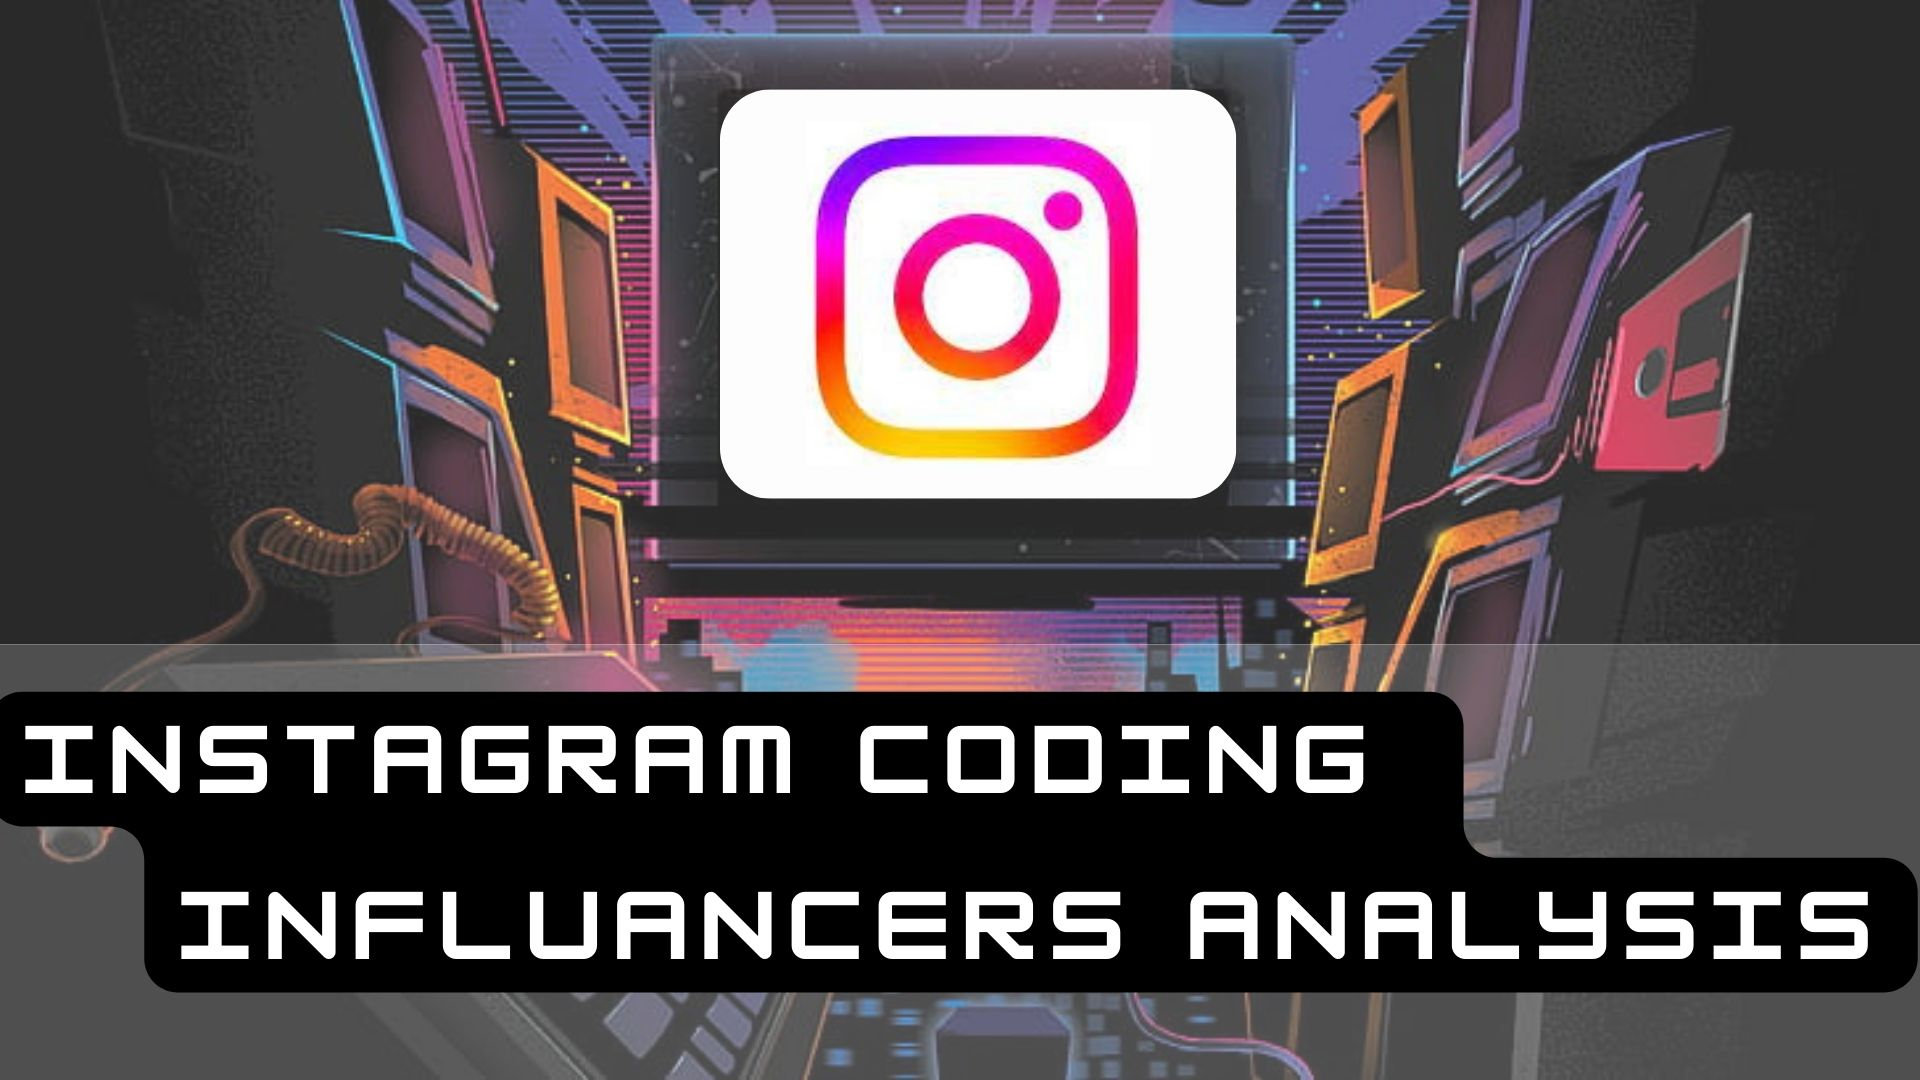
<hr>

## About Dataset

**Over 2000 leading Instagram Github coding influencers.Data points included in this dataset:**

- followers count
- profile type
- account type
- engagement score
- categories
- location
- external/bio links
- hashtags used
- brand affiliation
- bio
- highlights
- posts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
df = pd.read_csv('Instagram Profiles - Github Hashtag - instagram_profile.csv')

In [3]:
df.head()

,account,biography,business_address_json,business_category_name,business_email,external_url,fbid,followers,following,highlights,...,avg_engagement,post_hashtags,maybe_country_codes,bio_hashtags,avatar_cached,category_enum,category_name,changelog,full_name,is_private
0,yazilim.exe,◾️𝗖𝝝𝗗𝗜𝗡𝗚 ◾️𝗪𝗘𝗕 𝗗𝗘𝗩𝗘𝗟𝝝𝗣𝗘𝗥\n◾️𝗣𝗥𝝝𝗚𝗥𝝠𝗠𝗠𝗘𝗥 ◾️𝗦𝝝𝗖𝗜...,"{""city_name"":null,""city_id"":null,""latitude"":nu...",Creators & Celebrities,NaN,https://www.youtube.com/watch?v=Otnurz26st0&t=...,1.784143e+16,880,354,"[{""id"":""17880714053008666"",""title"":""Sound&#x1F...",...,0.0482,"[""code"",""yazilim"",""programmation"",""motivation""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
1,yazilimci.genclik,👩‍💻 Yazılımcı Gençlerin Buluşma Noktası 👨‍💻...,"{""city_name"":null,""city_id"":null,""latitude"":nu...",Non-Profits & Religious Organizations,info@yazilimcigenclik.com.tr,https://yazilimcigenclik.com.tr/telegram/,1.784141e+16,24036,103,"[{""id"":""18121606399097057"",""title"":""Sosyal Med...",...,0.0081,"[""yazilimcigenclik"",""programlama"",""programlama...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
2,yazilim.academy,🏢 Istanbul Technical University\n📍 Sıfırdan C ...,"{""city_name"":null,""city_id"":null,""latitude"":nu...",Personal Goods & General Merchandise Stores,NaN,NaN,1.784144e+16,2827,6695,"[{""id"":""17974324465320629"",""title"":""Yaz&#x131;...",...,0.0426,"[""software"",""cprogramming"",""cprogramlama"",""yaz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
3,yahya.kassid,#kdB.\nHi. and welcome I'm a #WebDesigner & #O...,NaN,NaN,NaN,http://yahyakassid.com/,1.784140e+16,1345,169,[],...,0.0192,"[""websitedesigner"",""designweb"",""web_design"",""w...","[""RU""]","[""kdb"",""webdesigner"",""onlinestorebuilder""]",avatar_yahya.kassid.jpg,NaN,Предприемач,"[{""followers"":1377,""following"":172,""avg_engage...",Yahya kassid | web designer,no
4,xnetking,🔥 | Developer's Planet ⚡\n📛 | Learn Coding ess...,NaN,NaN,NaN,https://www.xnetking.in/,1.784144e+16,208,73,"[{""id"":""17917345264765375"",""title"":""Resources""...",...,0.0985,"[""coding"",""developer"",""software"",""webdeveloper...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2180 entries, 0 to 2179
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account                  2180 non-null   object 
 1   biography                2059 non-null   object 
 2   business_address_json    256 non-null    object 
 3   business_category_name   953 non-null    object 
 4   business_email           211 non-null    object 
 5   external_url             1492 non-null   object 
 6   fbid                     2180 non-null   float64
 7   followers                2180 non-null   int64  
 8   following                2180 non-null   int64  
 9   highlights               2180 non-null   object 
 10  id                       2180 non-null   int64  
 11  is_business_account      2180 non-null   object 
 12  is_professional_account  2180 non-null   object 
 13  is_verified              2180 non-null   object 
 14  posts                   

- There are only 7 numrical columns and 25 string data type columns

## Creating some usefull functions for further use 

In [5]:
class visual_preprocess:
    def __init__(self):
        pass
        
    def _row_col(self, df):
        col = df.columns
        tot_col = df.shape[0]
        tot_row = df.shape[1]
        return col, tot_col, tot_row
        
    def disp_tot_row_col(self,df):
        _, tot_col, tot_row = self._row_col(df)
        data = {'Discription': ['Total Row count', 'Total column Count'],'count': [tot_row,tot_col]}
        return display(pd.DataFrame(data))
        return  tot_col, tot_row
    
    def missingv(self,df):
        plt.figure(figsize=(10,3))
        return sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

    def _null_calculator(self, df,per):
        col, t_col, t_row = self._row_col(df)    
        null_col, null_per = [],[]
        for i in col:
            null_percent = round((pd.isnull(df[i]).sum()/ t_col)*100,2)
            if null_percent >= per:
                null_col.append(i)
                null_per.append(null_percent)
        return null_col , null_per
        
    def null_percentage(self, df,per=0):
        null_col , null_per = self._null_calculator(df, per)
        data = { 'Columns' : null_col,
                '% empty' : null_per}
        data = pd.DataFrame(data)
        return data.sort_values(by='% empty', ascending=False)
    
    def get_col_empty(self,df, per=0):
        null_col , _ = self._null_calculator(df, per)
        return null_col
        



In [6]:
p = visual_preprocess()

## Total row and column in our data frame.

In [7]:
p.disp_tot_row_col(df)   

,Discription,count
0,Total Row count,32
1,Total column Count,2180


# Missing values

<Axes: >

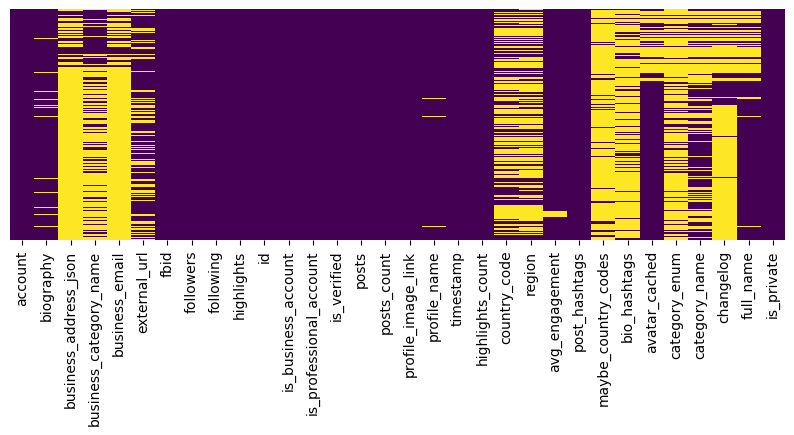

In [8]:
p.missingv(df)

- there are so many columns where data is missing more than 50%

In [9]:
p.null_percentage(df,50)

,Columns,% empty
2,business_email,90.32
5,maybe_country_codes,88.58
0,business_address_json,88.26
8,changelog,79.36
6,bio_hashtags,78.07
7,category_enum,76.33
4,region,66.06
3,country_code,58.39
1,business_category_name,56.28


- Above columns are empty more that 50% 

In [10]:
col_50_null =p.get_col_empty(df,50)

In [11]:
df.drop(col_50_null, axis=1, inplace=True)

- Dropped all the columns with more than 75% null values.
- We also dont need ID , avatar_cached , category_name and full name etc 

In [12]:
df.drop(['external_url','fbid','id','avatar_cached','profile_image_link','category_name','full_name','timestamp'], axis=1, inplace=True)

<Axes: >

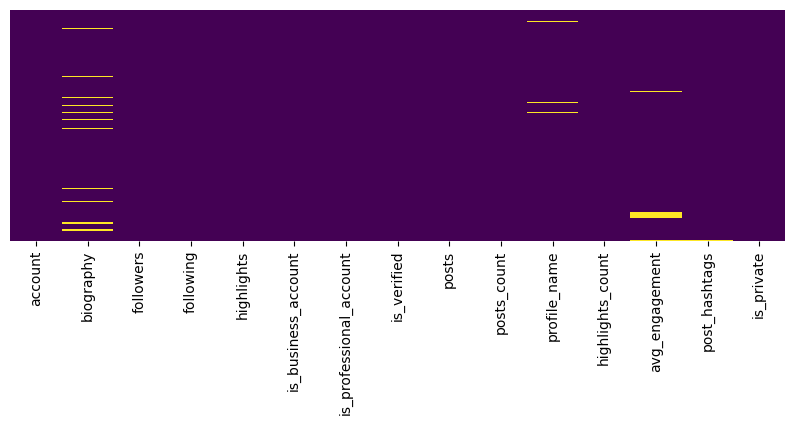

In [13]:
p.missingv(df)

C:\Users\Abhinav\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


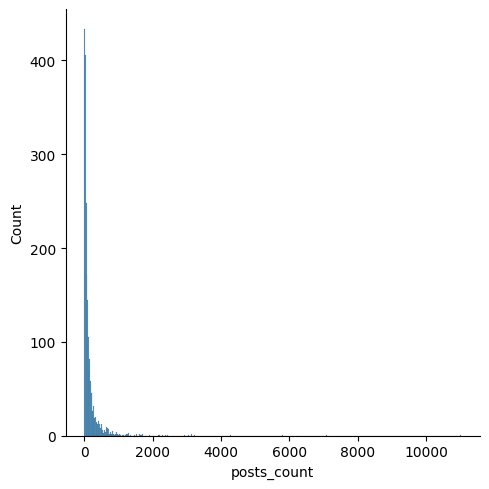

In [14]:
sns.displot(df['posts_count'])

- if we see post count data is skwed
- it is posible that few people posted more that 2000 posts but needs to investigate

In [15]:
df[df['posts_count']> 2000]

,account,biography,followers,following,highlights,is_business_account,is_professional_account,is_verified,posts,posts_count,profile_name,highlights_count,avg_engagement,post_hashtags,is_private
16,wearepirple,"We have classes on Java, Python, C#, R, HTML &...",34866,0,"[{""id"":""17844410084077793"",""title"":""Our Studen...",yes,yes,no,"[{""caption"":""In HTML what's the purpose of thi...",2585,Pirple,8,0.0016,"[""html"",""html5"",""xhtml"",""dhtml"",""htmlcss"",""htm...",no
36,startupnews.fyi,India’s Growing Startup News Company\nGet Info...,164937,1286,"[{""id"":""17893260181877823"",""title"":""Networking...",no,yes,no,"[{""caption"":""Spain's competition watchdog CNMC...",5798,Startup News,13,0.0050,"[""startupnews"",""startupnewsindia"",""startupindi...",no
137,analyticsindiamagazine,"😎 #artificialintelligence, #machinelearning a...",8465,30,"[{""id"":""17910417079754419"",""title"":""Videos"",""i...",yes,yes,no,"[{""caption"":""Sentiment Analysis (SA)is an amaz...",2357,Analytics India Magazine (AIM),9,0.0057,"[""sentimentanalysis"",""nlp"",""bert"",""naturallang...",no
236,cisca_dk,🍷Foodie&Wine Enthusiast\n📸 Reviews&Product pho...,15734,572,"[{""id"":""18125063101237416"",""title"":""Quotes"",""i...",no,yes,no,"[{""caption"":""@thebodyshopsouthafrica Love&Plum...",2915,Beauty|Food|Lifestyle|Wine,75,0.0188,"[""selflove"",""selfcare"",""loveyourself"",""bodypos...",no
261,_devcommunity,👩‍💻 Community of hustlers\n🔓 Follow for daily ...,54654,892,"[{""id"":""17877587315044584"",""title"":""This or Th...",yes,yes,no,"[{""caption"":""#Repost @danbatedev\n• • • • • •\...",4279,Rumi👤|_devcommunity.io,9,0.0039,"[""repost"",""gifted"",""setups"",""setup"",""desksetup...",no
283,digitalentrecruitment,👨🏽‍💻 Tech & Creative Recruitment Agency in 🇬🇧 ...,10766,5,"[{""id"":""17853810484360466"",""title"":""About Us"",...",yes,yes,no,"[{""caption"":""😂😂\n\nFollow us ➡️ @digitalentrec...",2188,Digitalent Recruitment Agency,6,0.0023,"[""programming"",""developerslife"",""javascript"",""...",no
406,linuxtechtips,👨‍💻 Nerd Memes 🤓\n📩Submit your memes👇\n📥 DM fo...,100337,130,"[{""id"":""17877078286422145"",""title"":""&#x1F44D;""...",yes,yes,no,"[{""caption"":""😂😂😂 Follow @LinuxTechTips for mor...",3213,Linux Tech Tips,2,0.0141,"[""itsecurity"",""codingmemes"",""programmers"",""hac...",no
426,malin_root,Inst: @malinrootgames\nC++/Java/game developer...,38659,1851,"[{""id"":""17916592066580500"",""title"":""YouTube(my...",no,yes,no,"[{""caption"":""@malin_root #malin_root #cppedit ...",7082,malinroot,25,0.0146,"[""malin_root"",""cppedit"",""javascript"",""develope...",no
459,proud_programmers,Hello ✍️\nbegin:\n From <developers> \n For ...,104322,1,"[{""id"":""18091797997160615"",""title"":""First QnA""...",no,yes,no,"[{""caption"":""Hello \n😐 Good Days \n\nRepost @t...",3041,Programming | Geek | Fun,13,0.0300,"[""programmers"",""system"",""computer"",""software"",...",no
471,programmerfect,🔹Learner ! Beginner\n🔹Coding Memes ! Python\n🔹...,53600,171,"[{""id"":""18086778247258177"",""title"":""Polls"",""im...",yes,yes,no,"[{""caption"":""Follow @programmerfect for daily ...",2803,Programmer Fect,5,0.0172,"[""stackoverflow"",""programming"",""python"",""java""...",no


- so data is skwed but these are correct data.

# EDA

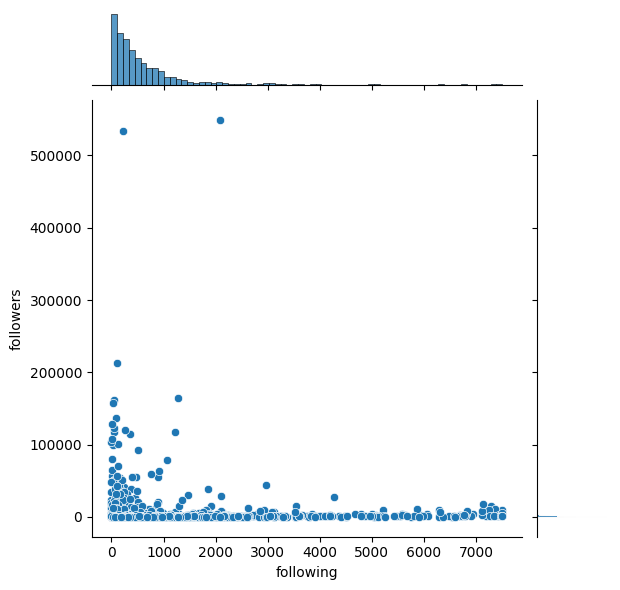

In [16]:
sns.jointplot(y= 'followers' ,x='following', data= df)

### Insight:
- If a account has more followers then that paticular account is following less people on insta.

<Axes: xlabel='highlights_count', ylabel='followers'>

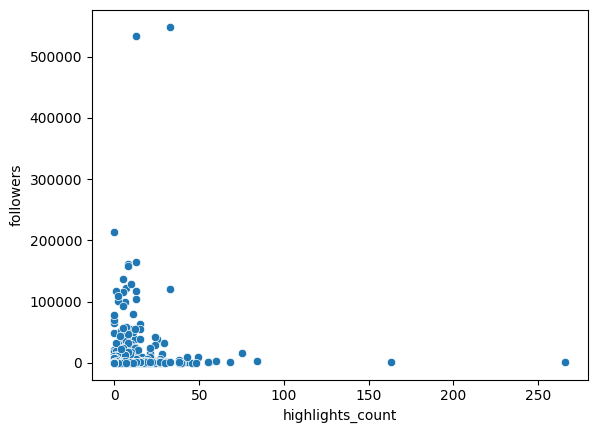

In [17]:
sns.scatterplot(x= 'highlights_count',y='followers', data= df)

## Insight:
- There is no direct relation between highlights_count and followers. But it looks like mostly influncers have highlights under 50.

# Link between followers, following  with business account

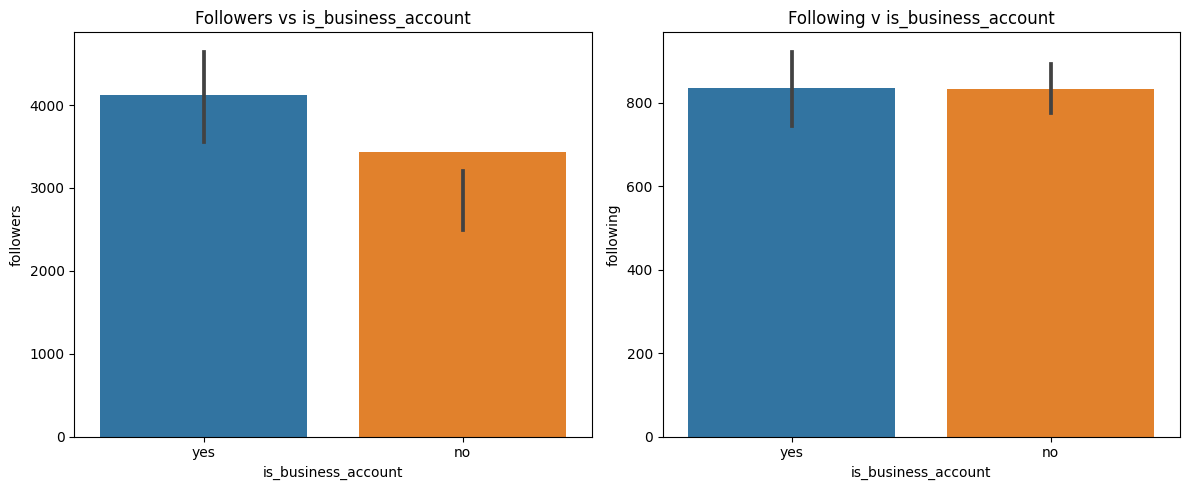

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x= 'is_business_account',y='followers', data= df,n_boot=2, ax=axes[0])
axes[0].set_title('Followers vs is_business_account')

sns.barplot(x= 'is_business_account',y='following', data= df,ax=axes[1])
axes[1].set_title('Following v is_business_account')

plt.tight_layout()
plt.show()

## Insight:
- Business account have more followers. People trust more on coding influencers with business_account.
- Both business and normal account influancers have similar trents when it comes to following others on instagram.

# Link between followers, following  with professional account

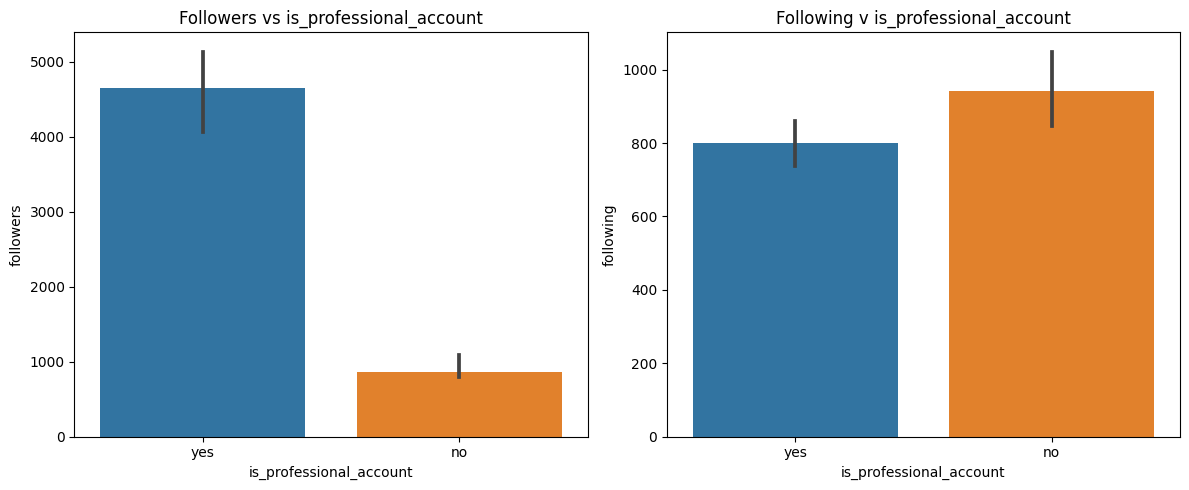

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x= 'is_professional_account',y='followers', data= df,n_boot=2, ax=axes[0])
axes[0].set_title('Followers vs is_professional_account')

sns.barplot(x= 'is_professional_account',y='following', data= df,ax=axes[1])
axes[1].set_title('Following v is_professional_account')

plt.tight_layout()
plt.show()

### Insight:
- Professional account have more number of followers
-  Non professional accounts are following more other accounts.

# Link between professional and business accounts

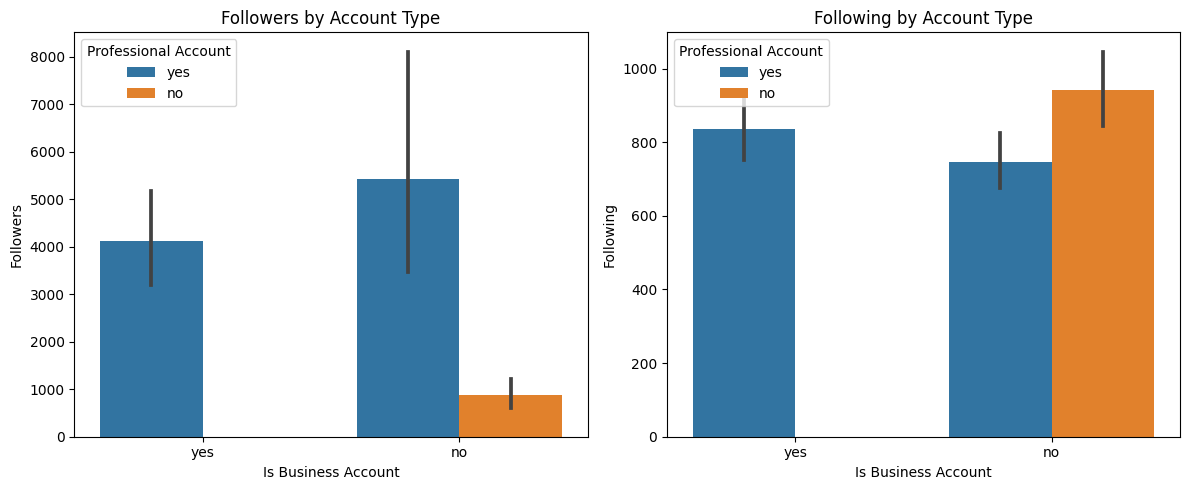

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x='is_business_account', y='followers', data=df, hue='is_professional_account', ax=axes[0])
axes[0].set_title('Followers by Account Type')
axes[0].set_xlabel('Is Business Account')
axes[0].set_ylabel('Followers')
axes[0].legend(title='Professional Account', loc='upper left')

sns.barplot(x='is_business_account', y='following', data=df, hue='is_professional_account', ax=axes[1])
axes[1].set_title('Following by Account Type')
axes[1].set_xlabel('Is Business Account')
axes[1].set_ylabel('Following')
axes[1].legend(title='Professional Account', loc='upper left')

plt.tight_layout()
plt.show()

## Insight:
- As expected if a profile is not a professional account you cannot convert it to a business account.
- Non professional and non business accounts are following more account. Basically these influncers are new and slowly slowly making their brand.
- professional_accounts which are non business have more followers.  

# Linke between professional account and varified account with followers and following counts

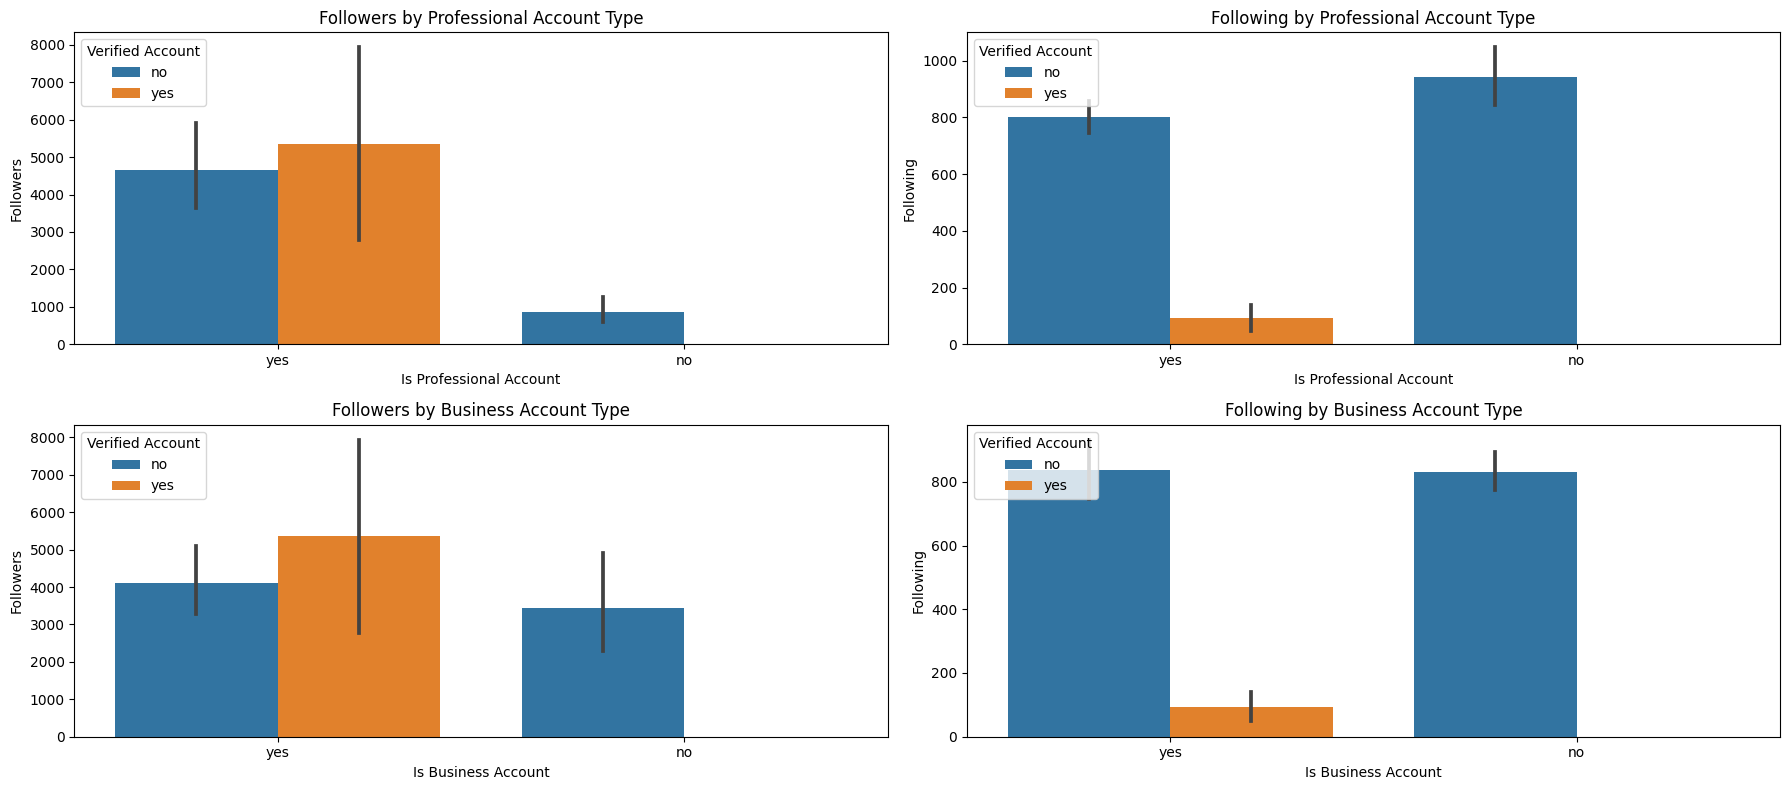

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))

sns.barplot(x='is_professional_account', y='followers', data=df, hue='is_verified', ax=axes[0,0])
axes[0,0].set_title('Followers by Professional Account Type')
axes[0,0].set_xlabel('Is Professional Account')
axes[0,0].set_ylabel('Followers')
axes[0,0].legend(title='Verified Account', loc='upper left')

sns.barplot(x='is_professional_account', y='following', data=df, hue='is_verified', ax=axes[0,1])
axes[0,1].set_title('Following by Professional Account Type')
axes[0,1].set_xlabel('Is Professional Account')
axes[0,1].set_ylabel('Following')
axes[0,1].legend(title='Verified Account', loc='upper left')

sns.barplot(x='is_business_account', y='followers', data=df, hue='is_verified', ax=axes[1,0])
axes[1,0].set_title('Followers by Business Account Type')
axes[1,0].set_xlabel('Is Business Account')
axes[1,0].set_ylabel('Followers')
axes[1,0].legend(title='Verified Account', loc='upper left')

sns.barplot(x='is_business_account', y='following', data=df, hue='is_verified', ax=axes[1,1])
axes[1,1].set_title('Following by Business Account Type')
axes[1,1].set_xlabel('Is Business Account')
axes[1,1].set_ylabel('Following')
axes[1,1].legend(title='Verified Account', loc='upper left')


plt.tight_layout()
plt.show()

### Insights:
- non-verified business accounts have more followers.
- non verified professional account have more followers.
- non professional no verified accounts as well as non business non verified account are following more number of accounts on instagram.
<br>
- **Cases not posible:**
  - verified non professional account.
  - verified non business account.

**Hence, If an account is verified then it is a professional as well as Business account**
 

In [22]:
pd.isnull(df['is_private']).sum()

2

we have null values for is_private column?

In [23]:
df[df['is_private'].isnull()]

,account,biography,followers,following,highlights,is_business_account,is_professional_account,is_verified,posts,posts_count,profile_name,highlights_count,avg_engagement,post_hashtags,is_private
364,ibmdata,📊 Data Viz\n🚶‍♀️ Analytics Walkthroughs\n🧠 Dat...,7938,48,"[{""id"":""17971700413377259"",""title"":""Trustworth...",yes,yes,yes,"[{""caption"":""The promise of economic freedom t...",70,IBM Data,2,0.0256,"[""crypto"",""cryptocurrency"",""bitcoin"",""ethereum...",NaN
1361,42heilbronn,🧑‍💻👩‍💻 free computer training open to all\n💻 ...,2779,139,"[{""id"":""17867504027592655"",""title"":""Life at 42...",yes,yes,yes,"[{""caption"":""Today we had our Piscine Kick Off...",146,42 Heilbronn,10,0.0326,"[""42heilbronn"",""42germany"",""ecole42"",""piscine""...",NaN


In [24]:
pd.DataFrame(df.groupby(['is_business_account', 'is_professional_account', 'is_verified'])['is_private'].unique().reset_index())

,is_business_account,is_professional_account,is_verified,is_private
0,no,no,no,"[no, yes]"
1,no,yes,no,[no]
2,yes,yes,no,[no]
3,yes,yes,yes,[nan]


- Its clear that if a account is business as well as professional then it is not a private account so bot the above null values should be no

In [25]:
df['is_private'].replace(to_replace=np.nan , value='no', inplace=True)
pd.isnull(df['is_private']).sum()

0

### Insight:
- if a account is not a business account , not a professional account and not verified then there is a 50% change that its a private or public account.
- in all the other cases a paticular account is public account.


In [26]:
df.columns

Index(['account', 'biography', 'followers', 'following', 'highlights',
       'is_business_account', 'is_professional_account', 'is_verified',
       'posts', 'posts_count', 'profile_name', 'highlights_count',
       'avg_engagement', 'post_hashtags', 'is_private'],
      dtype='object')

# Analysis based on post_count , highlight_count and avg_engagement

followers based on post_count , highlight_count and avg_engagement

C:\Users\Abhinav\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


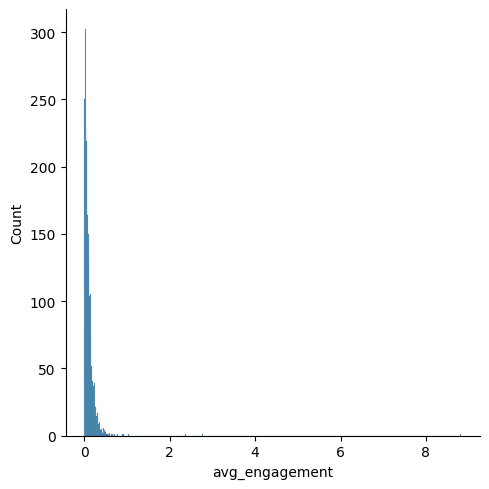

In [27]:
sns.displot(df['avg_engagement'])

### Insight:
- there are outliers in avg_engagement

In [28]:
df[df['avg_engagement']>2][['avg_engagement','followers', 'following' ,'is_business_account', 'is_professional_account', 'is_verified',]]

,avg_engagement,followers,following,is_business_account,is_professional_account,is_verified
485,2.7710,115,11,yes,yes,no
2030,2.3751,10453,104,no,no,no
2071,8.8269,104,5911,no,no,no


In [29]:
df['avg_engagement'].replace(to_replace=8.8269 , value=np.nan, inplace=True)
avg_eng = df.groupby(['is_business_account','is_professional_account','is_verified'])['avg_engagement'].max()[0] - df.groupby(['is_business_account','is_professional_account','is_verified'])['avg_engagement'].min()[0]
mn = df['avg_engagement'].mean()
def eng_calc (x, mn=mn, mde=avg_eng):
    if np.isnan(x):
        return np.random.randint(mn,mde+1)
    else: return  x
df['avg_engagement'] = df['avg_engagement'].apply(eng_calc)

- filled all the null value for avg_engagement

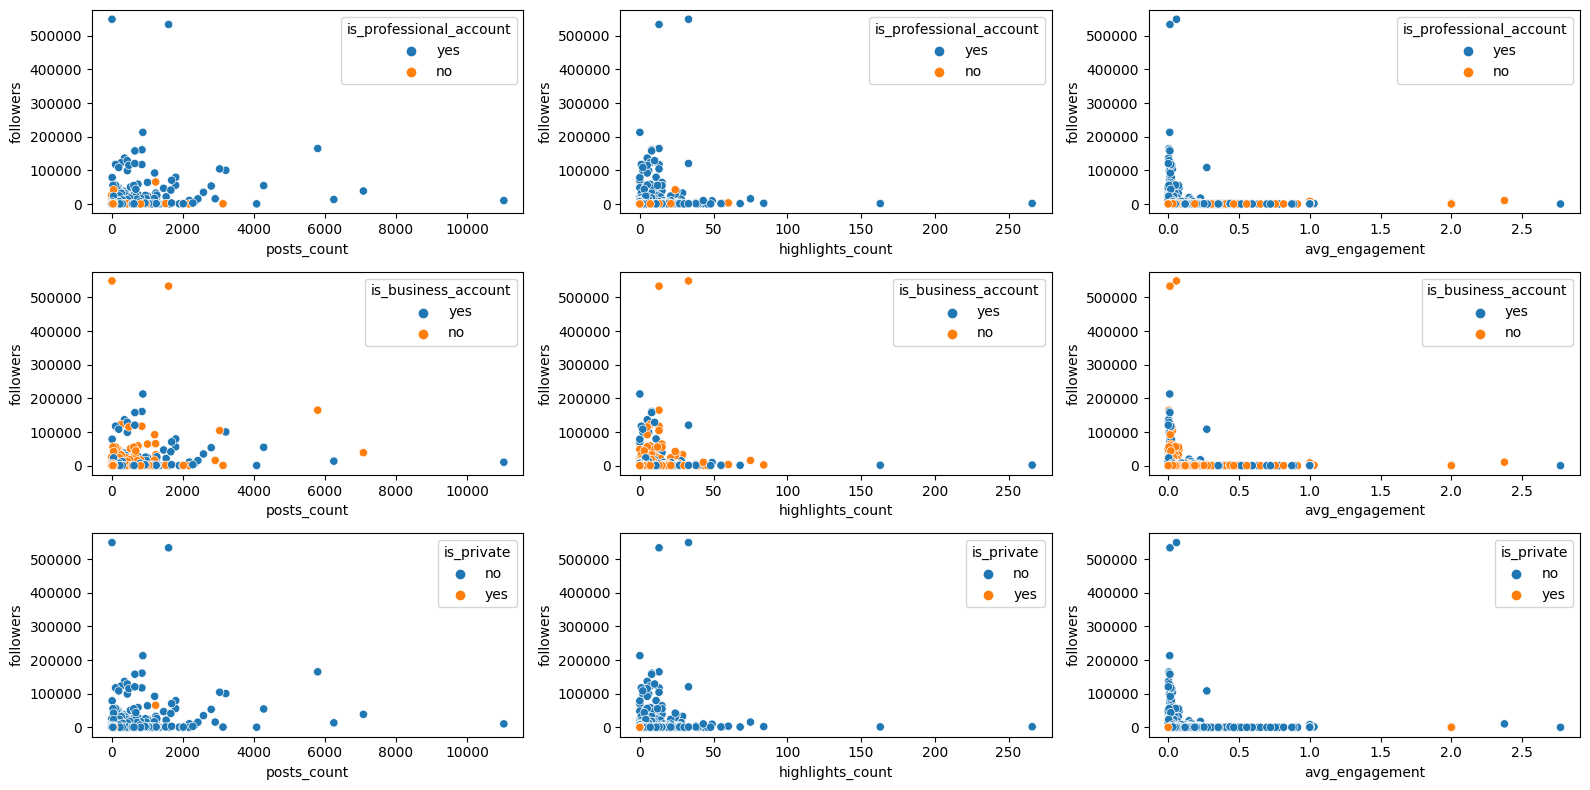

In [30]:

fig, axes = plt.subplots(3, 3, figsize=(16, 8))

sns.scatterplot(x='posts_count', y='followers', hue= 'is_professional_account', data=df, ax=axes[0,0])
sns.scatterplot(x= 'highlights_count', y='followers',hue= 'is_professional_account', data=df, ax=axes[0,1])
sns.scatterplot(x='avg_engagement', y='followers',hue= 'is_professional_account', data=df, ax=axes[0,2])

sns.scatterplot(x='posts_count', y='followers', hue= 'is_business_account', data=df, ax=axes[1,0])
sns.scatterplot(x= 'highlights_count', y='followers',hue= 'is_business_account', data=df, ax=axes[1,1])
sns.scatterplot(x='avg_engagement', y='followers',hue= 'is_business_account', data=df, ax=axes[1,2])


sns.scatterplot(x='posts_count', y='followers', hue= 'is_private', data=df, ax=axes[2,0])
sns.scatterplot(x= 'highlights_count', y='followers',hue= 'is_private', data=df, ax=axes[2,1])
sns.scatterplot(x='avg_engagement', y='followers',hue= 'is_private', data=df, ax=axes[2,2])

plt.tight_layout()
plt.show()

### Insights:
- Professional Account generally post more and have more followers, But there is no general trend.
- In general non professional accounts have very less followers for whatever highlights count.
- professional account have less average engagement but more followers.
  
- Non-business account have more followers for less post counts and highlight counts.
- Business account have more followers for even less avg.engagement.
- Its better to not keep your account private if you are an influncer.

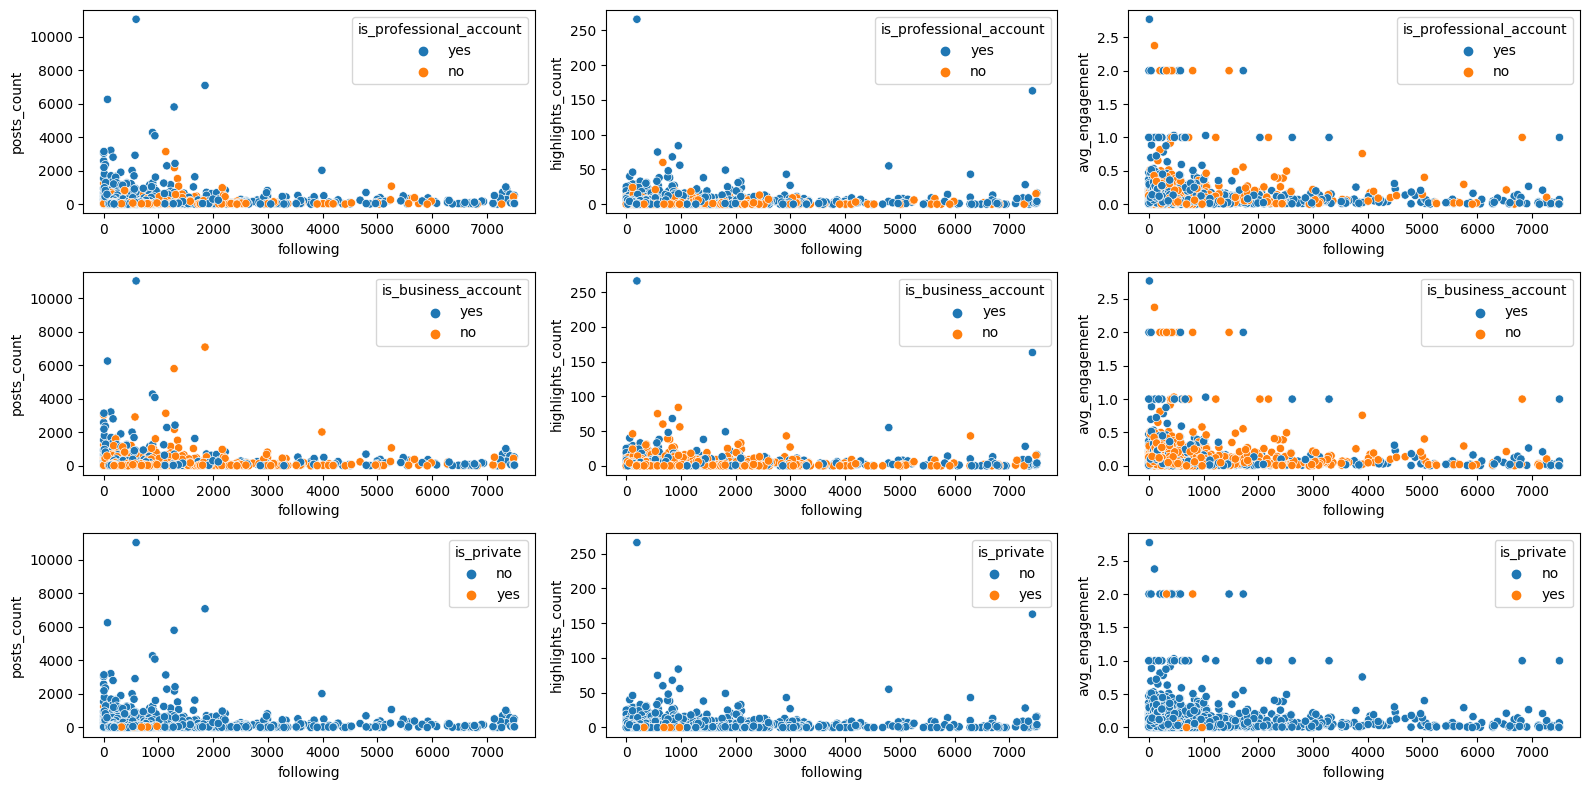

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(16, 8))

sns.scatterplot(y='posts_count', x='following', hue= 'is_professional_account', data=df, ax=axes[0,0])
sns.scatterplot(y= 'highlights_count', x='following',hue= 'is_professional_account', data=df, ax=axes[0,1])
sns.scatterplot(y='avg_engagement', x='following',hue= 'is_professional_account', data=df, ax=axes[0,2])

sns.scatterplot(y='posts_count', x='following', hue= 'is_business_account', data=df, ax=axes[1,0])
sns.scatterplot(y= 'highlights_count', x='following',hue= 'is_business_account', data=df, ax=axes[1,1])
sns.scatterplot(y='avg_engagement', x='following',hue= 'is_business_account', data=df, ax=axes[1,2])

sns.scatterplot(y='posts_count', x='following', hue= 'is_private', data=df, ax=axes[2,0])
sns.scatterplot(y= 'highlights_count', x='following',hue= 'is_private', data=df, ax=axes[2,1])
sns.scatterplot(y='avg_engagement', x='following',hue= 'is_private', data=df, ax=axes[2,2])

plt.tight_layout()
plt.show()

### Insight:
- for all type of account when post count is low they follow other account more.
- Non-business accounts are following less people and have better avg. engagement.
- avg.engagement of private account can be better while they follow less than 1000 other acccounts on instagram. 

# Top Hastags used by influancers

In [33]:
df['post_hashtags'].replace(to_replace=np.nan , value='["No tag"]', inplace=True)

In [65]:
from collections import Counter

def hastag_freq(df,top):
    hastag_list = []
    for i in range(df.shape[0]):
        b =[]
        a = df['post_hashtags'][i]
        a = a.split(",")
        b = [item.replace('[', '').replace('"', '').replace(']', '') for item in a] 
        for j in b:
            hastag_list.append(j)
        tag_freq = Counter(hastag_list)
    return pd.DataFrame(list(tag_freq.items()), columns=['Hastag', 'frequency']).sort_values(by='frequency',ascending=False).head(top)
    


## Overall Top 10 hastags in our Dataset

In [66]:
hastag_freq(df,10)

,Hastag,frequency
20,github,2157
139,programming,1174
11,coding,1132
6,javascript,1071
4,developer,1025
0,code,895
162,programmer,895
22,python,857
238,html,774
163,coder,758
